<a href="https://colab.research.google.com/github/gmarambaia/gmarambaia/blob/main/%5BAssignment_DataViz_1%5D_Applied_Data_Science_with_Python_Specialization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false; // disable scroll bar when displaying Folium map
}

# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Global Historical Climatology Network daily (GHCNd)](https://www.ncei.noaa.gov/products/land-based-station/global-historical-climatology-network-daily) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe - it's a wonderfully large dataset to play with! In particular, you will be asked to use data from the Ann Arbor Michigan location (my home!). and this is stored in the file: `assets/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`

Each row in this datafile corresponds to a single observation from a weather station, and has the following variables:
* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write a python notebook which plots line graphs of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015. (Based on the graph, do you think extreme weather is getting more frequent in 2015?)
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

I've written some steps I think would be good to go through, but there are other ways to solve this assignment so feel free to explore the pandas library! What I really want to see is an image that looks like this sketch I drew at my desk:

![](assets/chris_sketch.png)

In [ ]:
#  I'll be using the folium package to render the data into a map in Jupyter.

import folium
import pandas as pd

# get the location information for this dataset
df = pd.read_csv('assets/BinSize_d400.csv')
station_locations_by_hash = df[df['hash'] == 'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89']

# get longitude and lattitude to plot
lons = station_locations_by_hash['LONGITUDE'].tolist()
lats = station_locations_by_hash['LATITUDE'].tolist()

# plot on a beautiful folium map
my_map = folium.Map(location = [lats[0], lons[0]], height = 500,  zoom_start = 9)
for lat, lon in zip(lats, lons):
    folium.Marker([lat, lon]).add_to(my_map)

# render map in Jupyter
display(my_map)

## Step 1
Load the dataset and transform the data into Celcius (refer to documentation) then extract all of the rows which have minimum or maximum temperatures.

__hint: when I did this step I had two DataFrame objects, each with ~80,000 entries in it__

In [ ]:
import pandas as pd
df = pd.read_csv('assets/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
df.head()

# In a new code cell, transform the Data_Value column

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165085 entries, 0 to 165084
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   ID          165085 non-null  object
 1   Date        165085 non-null  object
 2   Element     165085 non-null  object
 3   Data_Value  165085 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 5.0+ MB


In [ ]:
df.Date = pd.to_datetime(df.Date)
df.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165085 entries, 0 to 165084
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   ID          165085 non-null  object        
 1   Date        165085 non-null  datetime64[ns]
 2   Element     165085 non-null  object        
 3   Data_Value  165085 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 5.0+ MB


In [ ]:
import numpy as np
df.sort_values(by = 'Date', inplace = True)
df.head()

,ID,Date,Element,Data_Value
60995,USW00004848,2005-01-01,TMIN,0
17153,USC00207320,2005-01-01,TMAX,150
17155,USC00207320,2005-01-01,TMIN,-11
10079,USW00014833,2005-01-01,TMIN,-44
10073,USW00014833,2005-01-01,TMAX,33


In [ ]:
#convert temperature from thenhs of degree C to degree C
df['Data_Value'] = 0.1*df.Data_Value
df.head()

,ID,Date,Element,Data_Value
60995,USW00004848,2005-01-01,TMIN,0.0
17153,USC00207320,2005-01-01,TMAX,15.0
17155,USC00207320,2005-01-01,TMIN,-1.1
10079,USW00014833,2005-01-01,TMIN,-4.4
10073,USW00014833,2005-01-01,TMAX,3.3


In [ ]:
#Creating TMAX dataframe
df_TMAX = df[df.Element == 'TMAX']
df_TMAX.head()

,ID,Date,Element,Data_Value
17153,USC00207320,2005-01-01,TMAX,15.0
10073,USW00014833,2005-01-01,TMAX,3.3
60994,USW00004848,2005-01-01,TMAX,13.3
39454,USC00205563,2005-01-01,TMAX,2.8
18049,USW00014853,2005-01-01,TMAX,5.6


In [ ]:
df_TMAX.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83063 entries, 17153 to 21088
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ID          83063 non-null  object        
 1   Date        83063 non-null  datetime64[ns]
 2   Element     83063 non-null  object        
 3   Data_Value  83063 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 3.2+ MB


In [ ]:
#Creating TMIN dataframe
df_MIN = df[df.Element == 'TMIN']
df_MIN.head()

,ID,Date,Element,Data_Value
60995,USW00004848,2005-01-01,TMIN,0.0
17155,USC00207320,2005-01-01,TMIN,-1.1
10079,USW00014833,2005-01-01,TMIN,-4.4
2812,USC00203712,2005-01-01,TMIN,-5.0
24805,USW00094889,2005-01-01,TMIN,-5.6


In [ ]:
df_MIN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82022 entries, 60995 to 29410
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ID          82022 non-null  object        
 1   Date        82022 non-null  datetime64[ns]
 2   Element     82022 non-null  object        
 3   Data_Value  82022 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 3.1+ MB


## Step 2
In order to visualize the data we would plot the min and max data for each day of the year between the years 2005 and 2014 across all weather stations. But we also need to find out when the min or max temperature in 2015 falls below the min or rises above the max for the previous decade.

If you did step 1 you have two Series objects with min and max times for the years 2005 through 2015. You can use Pandas `groupby` to create max and min temperature Series objects across all weather stations for each day of these years, and you can deal with the records for February 29 (the leap year) by dropping them.

__hint: when I finished this step, I had two DataFrame objects, each with exactly 4015 observations in them__

In [ ]:
# create a DataFrame of maximum temperature by date

# create a DataFrame of minimum temperatures by date

In [ ]:
df_TMAX['Month'] = df_TMAX['Date'].apply(lambda x: x.month)
df_TMAX['Year'] = df_TMAX['Date'].apply(lambda x: x.year)
df_TMAX['Day'] = df_TMAX['Date'].apply(lambda x: x.day)

df_TMAX.head()

,ID,Date,Element,Data_Value,Month,Year,Day
17153,USC00207320,2005-01-01,TMAX,15.0,1,2005,1
10073,USW00014833,2005-01-01,TMAX,3.3,1,2005,1
60994,USW00004848,2005-01-01,TMAX,13.3,1,2005,1
39454,USC00205563,2005-01-01,TMAX,2.8,1,2005,1
18049,USW00014853,2005-01-01,TMAX,5.6,1,2005,1


In [ ]:
#Looking for year with 29th February
np.unique(df_TMAX[(df_TMAX['Day'] == 29)&(df_TMAX['Month'] == 2)]['Year'])

array([2008, 2012])

In [ ]:
#Removing 29th February
df_TMAX = df_TMAX[~ df_TMAX['Date'].isin(['2012-02-29','2008-02-29'])]

In [ ]:
df_TMAX.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83020 entries, 17153 to 21088
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ID          83020 non-null  object        
 1   Date        83020 non-null  datetime64[ns]
 2   Element     83020 non-null  object        
 3   Data_Value  83020 non-null  float64       
 4   Month       83020 non-null  int64         
 5   Year        83020 non-null  int64         
 6   Day         83020 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 5.1+ MB


In [ ]:
df_MIN['Month'] = df_MIN['Date'].apply(lambda x: x.month)
df_MIN['Year'] = df_MIN['Date'].apply(lambda x: x.year)
df_MIN['Day'] = df_MIN['Date'].apply(lambda x: x.day)

df_MIN.head()

,ID,Date,Element,Data_Value,Month,Year,Day
60995,USW00004848,2005-01-01,TMIN,0.0,1,2005,1
17155,USC00207320,2005-01-01,TMIN,-1.1,1,2005,1
10079,USW00014833,2005-01-01,TMIN,-4.4,1,2005,1
2812,USC00203712,2005-01-01,TMIN,-5.0,1,2005,1
24805,USW00094889,2005-01-01,TMIN,-5.6,1,2005,1


In [ ]:
df_TMIN = df_MIN

In [ ]:
#Looking for year with 29th February
np.unique(df_TMIN[(df_TMIN['Day'] == 29)&(df_TMIN['Month'] == 2)]['Year'])

array([2008, 2012])

In [ ]:
#Removing 29th February
df_TMIN = df_TMIN[~ df_TMIN['Date'].isin(['2012-02-29','2008-02-29'])]

In [ ]:
df_TMIN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81982 entries, 60995 to 29410
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ID          81982 non-null  object        
 1   Date        81982 non-null  datetime64[ns]
 2   Element     81982 non-null  object        
 3   Data_Value  81982 non-null  float64       
 4   Month       81982 non-null  int64         
 5   Year        81982 non-null  int64         
 6   Day         81982 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 5.0+ MB


In [ ]:
#First I'll drop columns that are not needed anymore
TMAX = df_TMAX.drop(['Day','Month','Year',], axis = 1)
TMAX.head()

,ID,Date,Element,Data_Value
17153,USC00207320,2005-01-01,TMAX,15.0
10073,USW00014833,2005-01-01,TMAX,3.3
60994,USW00004848,2005-01-01,TMAX,13.3
39454,USC00205563,2005-01-01,TMAX,2.8
18049,USW00014853,2005-01-01,TMAX,5.6


In [ ]:
#Now I will group the TMAX df by date returning the maximum value for each date
TMAX = TMAX.groupby(by='Date').max()
TMAX.head()

,ID,Element,Data_Value
Date,,,
2005-01-01,USW00094889,TMAX,15.6
2005-01-02,USW00094889,TMAX,13.9
2005-01-03,USW00094889,TMAX,13.3
2005-01-04,USW00094889,TMAX,3.9
2005-01-05,USW00094889,TMAX,3.3


In [ ]:
#Now I will reset the indexes
TMAX = TMAX.reset_index(level=0)
TMAX.head()

,Date,ID,Element,Data_Value
0,2005-01-01,USW00094889,TMAX,15.6
1,2005-01-02,USW00094889,TMAX,13.9
2,2005-01-03,USW00094889,TMAX,13.3
3,2005-01-04,USW00094889,TMAX,3.9
4,2005-01-05,USW00094889,TMAX,3.3


In [ ]:
TMAX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4015 entries, 0 to 4014
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        4015 non-null   datetime64[ns]
 1   ID          4015 non-null   object        
 2   Element     4015 non-null   object        
 3   Data_Value  4015 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 125.6+ KB


In [ ]:
#First I'll drop columns that are not needed anymore
TMIN = df_TMIN.drop(['Day','Month','Year',], axis = 1)
TMIN.head()

,ID,Date,Element,Data_Value
60995,USW00004848,2005-01-01,TMIN,0.0
17155,USC00207320,2005-01-01,TMIN,-1.1
10079,USW00014833,2005-01-01,TMIN,-4.4
2812,USC00203712,2005-01-01,TMIN,-5.0
24805,USW00094889,2005-01-01,TMIN,-5.6


In [ ]:
#Now I will group the TMIN df by date returning the minimum value for each date
TMIN = TMIN.groupby(by='Date').min()
TMIN.head()

,ID,Element,Data_Value
Date,,,
2005-01-01,USC00200032,TMIN,-5.6
2005-01-02,USC00200032,TMIN,-5.6
2005-01-03,USC00200032,TMIN,0.0
2005-01-04,USC00200032,TMIN,-3.9
2005-01-05,USC00200032,TMIN,-9.4


In [ ]:
#Now I will reset the indexes
TMIN = TMIN.reset_index(level=0)
TMIN.head()

,Date,ID,Element,Data_Value
0,2005-01-01,USC00200032,TMIN,-5.6
1,2005-01-02,USC00200032,TMIN,-5.6
2,2005-01-03,USC00200032,TMIN,0.0
3,2005-01-04,USC00200032,TMIN,-3.9
4,2005-01-05,USC00200032,TMIN,-9.4


In [ ]:
TMIN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4015 entries, 0 to 4014
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        4015 non-null   datetime64[ns]
 1   ID          4015 non-null   object        
 2   Element     4015 non-null   object        
 3   Data_Value  4015 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 125.6+ KB


## Step 3
Now that you have grouped the daily max and min temperatures for each day of the years 2005 through 2015, you can separate out the data for 2015. Then you can use the Pandas `groupby` function to find the max and min of the temperature data for each __day of the year__ for the 2005-2014 data.

__hint: at the end of this step I had two DataFrames, one of maximum and the other of minimum values, which each had 365 observations in them. I also had another pair of similar DataFrames but only for the year 2015.__

In [ ]:
# calculate the minimum and maximum values for the day of the year for 2005 through 2014

# calculate the minimum and maximum values for the years 2015

In [ ]:
#Merging the dataframes using the Date column
TMAX_TMIN = TMAX.merge(TMIN, on ='Date')
TMAX_TMIN.head()

,Date,ID_x,Element_x,Data_Value_x,ID_y,Element_y,Data_Value_y
0,2005-01-01,USW00094889,TMAX,15.6,USC00200032,TMIN,-5.6
1,2005-01-02,USW00094889,TMAX,13.9,USC00200032,TMIN,-5.6
2,2005-01-03,USW00094889,TMAX,13.3,USC00200032,TMIN,0.0
3,2005-01-04,USW00094889,TMAX,3.9,USC00200032,TMIN,-3.9
4,2005-01-05,USW00094889,TMAX,3.3,USC00200032,TMIN,-9.4


In [ ]:
#Renaming the columns
TMAX_TMIN.rename(columns = {
    'ID_x':'TMAX_ID',
    'Element_x':'TMAX_Element',
    'Data_Value_x':'TMAX',
    'ID_y':'TMIN_ID',
    'Element_y':'TMIN_Element',
    'Data_Value_y':'TMIN'}, inplace = True)

TMAX_TMIN.head()

,Date,TMAX_ID,TMAX_Element,TMAX,TMIN_ID,TMIN_Element,TMIN
0,2005-01-01,USW00094889,TMAX,15.6,USC00200032,TMIN,-5.6
1,2005-01-02,USW00094889,TMAX,13.9,USC00200032,TMIN,-5.6
2,2005-01-03,USW00094889,TMAX,13.3,USC00200032,TMIN,0.0
3,2005-01-04,USW00094889,TMAX,3.9,USC00200032,TMIN,-3.9
4,2005-01-05,USW00094889,TMAX,3.3,USC00200032,TMIN,-9.4


In [ ]:
#Dropping Element and ID columns as they are not needed anymore
TMAX_TMIN = TMAX_TMIN.drop(['TMAX_Element','TMIN_Element','TMAX_ID','TMIN_ID'], axis = 1)
TMAX_TMIN.head()

,Date,TMAX,TMIN
0,2005-01-01,15.6,-5.6
1,2005-01-02,13.9,-5.6
2,2005-01-03,13.3,0.0
3,2005-01-04,3.9,-3.9
4,2005-01-05,3.3,-9.4


In [ ]:
TMAX_TMIN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4015 entries, 0 to 4014
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    4015 non-null   datetime64[ns]
 1   TMAX    4015 non-null   float64       
 2   TMIN    4015 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 125.5 KB


In [ ]:
#Creating month,year and day columns again
TMAX_TMIN['Month'] = TMAX_TMIN['Date'].apply(lambda x: x.month)
TMAX_TMIN['Year'] = TMAX_TMIN['Date'].apply(lambda x: x.year)
TMAX_TMIN['Day'] = TMAX_TMIN['Date'].apply(lambda x: x.day)

TMAX_TMIN.head()

,Date,TMAX,TMIN,Month,Year,Day
0,2005-01-01,15.6,-5.6,1,2005,1
1,2005-01-02,13.9,-5.6,1,2005,2
2,2005-01-03,13.3,0.0,1,2005,3
3,2005-01-04,3.9,-3.9,1,2005,4
4,2005-01-05,3.3,-9.4,1,2005,5


In [ ]:
#Creating 2005-2014 records dataframe
records_05_14 = TMAX_TMIN[TMAX_TMIN['Year'] !=2015]
records_05_14.tail()

,Date,TMAX,TMIN,Month,Year,Day
3645,2014-12-27,11.1,-2.8,12,2014,27
3646,2014-12-28,13.3,-6.0,12,2014,28
3647,2014-12-29,8.9,-11.0,12,2014,29
3648,2014-12-30,3.3,-11.1,12,2014,30
3649,2014-12-31,-2.8,-13.8,12,2014,31


In [ ]:
#Returning the max and minimum temperatures for each day of the year
records_05_14 = records_05_14.groupby(['Month','Day']).agg({'TMAX' : 'max', 'TMIN' : 'min'})
records_05_14.head()

TMAX  TMIN
Month Day            
1     1    15.6 -16.0
      2    13.9 -26.7
      3    13.3 -26.7
      4    10.6 -26.1
      5    12.8 -15.0

In [ ]:
#Now I will reset the indexes
records_05_14 = records_05_14.reset_index(level=0)
records_05_14.head()

,Month,TMAX,TMIN
Day,,,
1,1,15.6,-16.0
2,1,13.9,-26.7
3,1,13.3,-26.7
4,1,10.6,-26.1
5,1,12.8,-15.0


In [ ]:
#Now I will reset the indexes
records_05_14 = records_05_14.reset_index(level=0)
records_05_14.head()

,Day,Month,TMAX,TMIN
0,1,1,15.6,-16.0
1,2,1,13.9,-26.7
2,3,1,13.3,-26.7
3,4,1,10.6,-26.1
4,5,1,12.8,-15.0


In [ ]:
records_05_14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Day     365 non-null    int64  
 1   Month   365 non-null    int64  
 2   TMAX    365 non-null    float64
 3   TMIN    365 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 11.5 KB


In [ ]:
#Creating 2015 records dataframe
records_15 = TMAX_TMIN[TMAX_TMIN['Year'] == 2015]

#Returning the max and minimum temperatures for each day of the year
records_15 = records_15.groupby(['Month','Day']).agg({'TMAX' : 'max', 'TMIN' : 'min'})

#Reseting indexes
records_15 = records_15.reset_index(level=0)
records_15 = records_15.reset_index(level=0)

records_15.head()

,Day,Month,TMAX,TMIN
0,1,1,1.1,-13.3
1,2,1,3.9,-12.2
2,3,1,3.9,-6.7
3,4,1,4.4,-8.8
4,5,1,2.8,-15.5


In [ ]:
records_15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Day     365 non-null    int64  
 1   Month   365 non-null    int64  
 2   TMAX    365 non-null    float64
 3   TMIN    365 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 11.5 KB


In [ ]:
#mergin both dataframes
final_df = pd.merge(records_05_14, records_15, how = 'outer', left_index = True, right_index = True)
final_df.head()

,Day_x,Month_x,TMAX_x,TMIN_x,Day_y,Month_y,TMAX_y,TMIN_y
0,1,1,15.6,-16.0,1,1,1.1,-13.3
1,2,1,13.9,-26.7,2,1,3.9,-12.2
2,3,1,13.3,-26.7,3,1,3.9,-6.7
3,4,1,10.6,-26.1,4,1,4.4,-8.8
4,5,1,12.8,-15.0,5,1,2.8,-15.5


In [ ]:
#Reorganizing the dataframe
#Dropping unecessary columns
final_df = final_df.drop(['Day_y','Month_y'], axis = 1)

#Renaming the columns
final_df.rename(columns = {
    'Day_x':'Day',
    'Month_x':'Month',
    'TMAX_x':'TMAX_05_14',
    'TMIN_x':'TMIN_05_14',
    'TMAX_y':'TMAX_15',
    'TMIN_y':'TMIN_15'}, inplace = True)

final_df.head()

,Day,Month,TMAX_05_14,TMIN_05_14,TMAX_15,TMIN_15
0,1,1,15.6,-16.0,1.1,-13.3
1,2,1,13.9,-26.7,3.9,-12.2
2,3,1,13.3,-26.7,3.9,-6.7
3,4,1,10.6,-26.1,4.4,-8.8
4,5,1,12.8,-15.0,2.8,-15.5


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Day         365 non-null    int64  
 1   Month       365 non-null    int64  
 2   TMAX_05_14  365 non-null    float64
 3   TMIN_05_14  365 non-null    float64
 4   TMAX_15     365 non-null    float64
 5   TMIN_15     365 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 17.2 KB


## Step 4
Now it's time to plot! You need to explore matplotlib in order to plot line graphs of the min and max temperatures for the years 2005 through 2014 and to scatter plot __only__ the daily 2015 temperatures that exceeded those values.

In [ ]:
%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt
from calendar import month_abbr

# put your plotting code here!

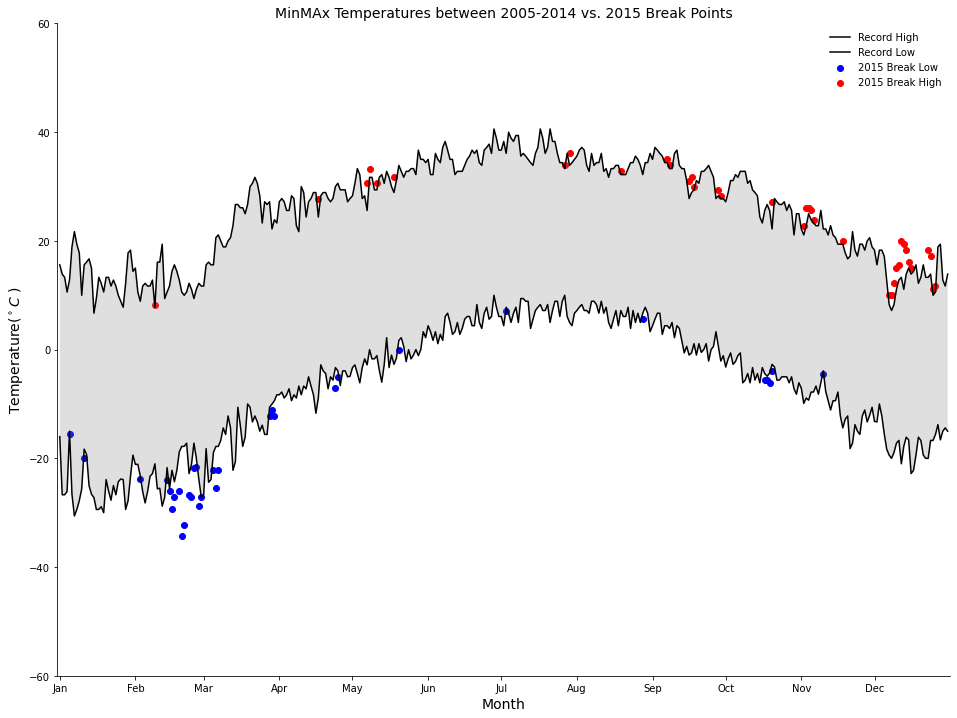

In [ ]:
plt.figure(figsize=(16,12))
plt.plot(np.arange(len(final_df.TMAX_05_14)),final_df.TMAX_05_14, '-k', label="Record High")
plt.plot(np.arange(len(final_df.TMAX_05_14)),final_df.TMIN_05_14, '-k',label="Record Low")
plt.scatter(np.where(final_df.TMIN_15 < final_df.TMIN_05_14.values),  final_df.TMIN_15[final_df.TMIN_15 < final_df.TMIN_05_14].values,c='b',label='2015 Break Low')
plt.scatter(np.where(final_df.TMAX_15 > final_df.TMAX_05_14.values),  final_df.TMAX_15[final_df.TMAX_15 > final_df.TMAX_05_14].values,c='r',label='2015 Break High')
plt.xlabel('Month',size=14) 
plt.ylabel('Temperature($^\circ C$ )',size=14)
tick = [0,31,59,90,120,151,181,212,243,273,304,334]
plt.xticks(tick, ['Jan','Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']) 
ax=plt.gca() 
ax.axis([-1,365,-60,60]) 
plt.gca().fill_between(np.arange(0,365),final_df.TMIN_05_14, final_df.TMAX_05_14, facecolor='gray',alpha=0.25) 
plt.title('MinMAx Temperatures between 2005-2014 vs. 2015 Break Points',size=14) 
plt.grid()
plt.legend(loc=0, frameon=False);

plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().grid(False)

plt.savefig('assignment2.png')